In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from numpy import cos,sin,radians
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib.pyplot as plt
import numpy as np
import io

In [140]:
in_file="part-00000-2795d69a-cc16-4c31-bc26-db2182606e43-c000.gz.parquet"
user_id="5f8f047a52e859ef03117e71" # Roboat
race_id=440 # VG

In [141]:
df = pd.read_parquet(in_file)
df.head()

user_id  race_id         received_at        lastCalcDate  \
0  5f3b964b52e859ef03fd61ea      466 2020-10-30 16:26:01 2020-10-14 14:10:00   
1  5f3b964b52e859ef03fd61ea      466 2020-10-30 16:37:17 2020-10-14 14:10:00   
2  5f3b964b52e859ef03fd61ea      438 2020-10-30 16:52:41 2020-10-30 16:50:48   
3  5f1eca4c52e859ef03f996d7      438 2020-10-30 16:52:41 2020-10-30 16:50:46   
4  5f8317c452e859ef030c6b8d      438 2020-10-30 16:52:42 2020-10-30 16:50:48   

       lat       lon  heading    speed       twa      tws       twd  sail  \
0  14.2377 -78.82540    320.0  15.0777  109.8000  12.9258   69.8005   0.0   
1  14.2377 -78.82540    320.0  15.0777  109.8000  12.9258   69.8005   0.0   
2 -34.5217  -6.59496    110.0  19.5659 -122.7100  11.0091  347.2900   0.0   
3 -34.2016  17.86810    227.0  21.4731  -67.7457  22.3786  159.2540   0.0   
4  42.6487 -14.76840    240.0  10.4101  -28.9203  21.1245  211.0800   0.0   

   distanceFromStart  distanceToEnd  credits  
0             287.29         730.13      400  
1             287.29         730.13      400  
2            6637.83        3502.98     2000  
3            7353.07        2272.01        0  
4             720.81        7688.20     2000

In [142]:
df["received_at"][0]

Timestamp('2020-10-30 16:26:01')

In [143]:
def adjust_twa(twa):
    if twa > 0:
        return twa
    return -twa

In [144]:
df_filtered = df[(df["user_id"]==user_id) & (df["race_id"]==race_id)]
df_filtered["lastCalcDateOnly"]=[x.date() for x in df_filtered["lastCalcDate"]]
df_filtered["twa_adjusted"]=[adjust_twa(x) for x in df_filtered["twa"]]
df_filtered.describe()

race_id          lat          lon      heading        speed  \
count   4446.0  4446.000000  4446.000000  4446.000000  4446.000000   
mean     440.0   -16.227475    -4.584451   135.579148    12.321368   
std        0.0    33.034701    68.388910    86.957822     5.339262   
min      440.0   -57.219200  -179.868000     1.000000     0.008490   
25%      440.0   -44.747000   -26.396250    79.000000     8.619798   
50%      440.0   -28.372450   -18.726050   109.000000    12.749900   
75%      440.0    10.821475     5.434848   180.000000    16.238225   
max      440.0    46.461300   179.897000   358.000000    22.977700   

               twa          tws          twd    sail  distanceFromStart  \
count  4446.000000  4446.000000  4446.000000  4446.0        4446.000000   
mean     -4.758570    13.816620   203.371184     0.0       12471.642677   
std     115.725737     6.873603   106.090327     0.0        8348.559112   
min    -179.323000     2.000000     0.012600     0.0           2.870000   
25%    -117.647750     8.402097   104.984750     0.0        4788.650000   
50%     -53.269550    13.671500   224.187000     0.0       11529.750000   
75%     112.400250    17.630575   291.036250     0.0       20495.450000   
max     179.657000    36.701600   359.842000     0.0       27228.200000   

       distanceToEnd  credits  twa_adjusted  
count    4446.000000   4446.0   4446.000000  
mean    12936.622985   2400.0    110.091725  
std      7306.490491      0.0     35.946912  
min        73.290000   2400.0      0.038520  
25%      5708.607500   2400.0     83.080125  
50%     13944.700000   2400.0    115.338000  
75%     20127.750000   2400.0    140.277500  
max     23263.300000   2400.0    179.657000

In [145]:
df_mean = df_filtered.groupby(['lastCalcDateOnly']).mean()
df_mean.describe()

race_id        lat         lon     heading      speed         twa  \
count     93.0  93.000000   93.000000   93.000000  93.000000   93.000000   
mean     440.0 -16.071299   -4.707470  135.724871  12.325318   -4.892055   
std        0.0  33.428112   67.486522   76.263279   4.572581   92.875428   
min      440.0 -56.961740 -172.717130    8.333333   2.343838 -144.721813   
25%      440.0 -44.662704  -25.860473   85.395833   9.007691  -80.637671   
50%      440.0 -28.262227  -18.495323  108.166667  12.781478  -17.083827   
75%      440.0  11.098431    4.915254  179.333333  15.740950   87.952188   
max      440.0  46.156137  170.497854  345.693878  22.479313  146.299292   

             tws         twd  sail  distanceFromStart  distanceToEnd  credits  \
count  93.000000   93.000000  93.0          93.000000      93.000000     93.0   
mean   13.824069  203.627753   0.0       12466.580178   12939.070013   2400.0   
std     6.234855   90.840237   0.0        8410.759453    7357.441054      0.0   
min     2.562142   15.968283   0.0          83.634583     161.981591   2400.0   
25%     9.237410  125.448467   0.0        4875.544792    5741.487083   2400.0   
50%    13.853756  228.546917   0.0       11539.850000   13928.695833   2400.0   
75%    16.680181  276.024449   0.0       20452.833333   20069.956250   2400.0   
max    32.028969  347.957542   0.0       27123.363636   23187.975000   2400.0   

       twa_adjusted  
count     93.000000  
mean     109.942832  
std       31.244212  
min       28.914343  
25%       82.611936  
50%      114.284771  
75%      137.769174  
max      155.452500

In [146]:
def get_cmap(n, name='YlOrBr'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [147]:
def separate_df(in_df, feature, labels, step, points):
    out_df_list=[]
    for index, point in enumerate(points[:-1]):
        if index==1:
            out_df_list.append(in_df[in_df[feature]<point])
        else:
            out_df_list.append(in_df[(in_df[feature]>point-step) & (in_df[feature]<point)])
    # Handle last element
    out_df_list.append(in_df[in_df[feature]>points[-1]])
    return out_df_list

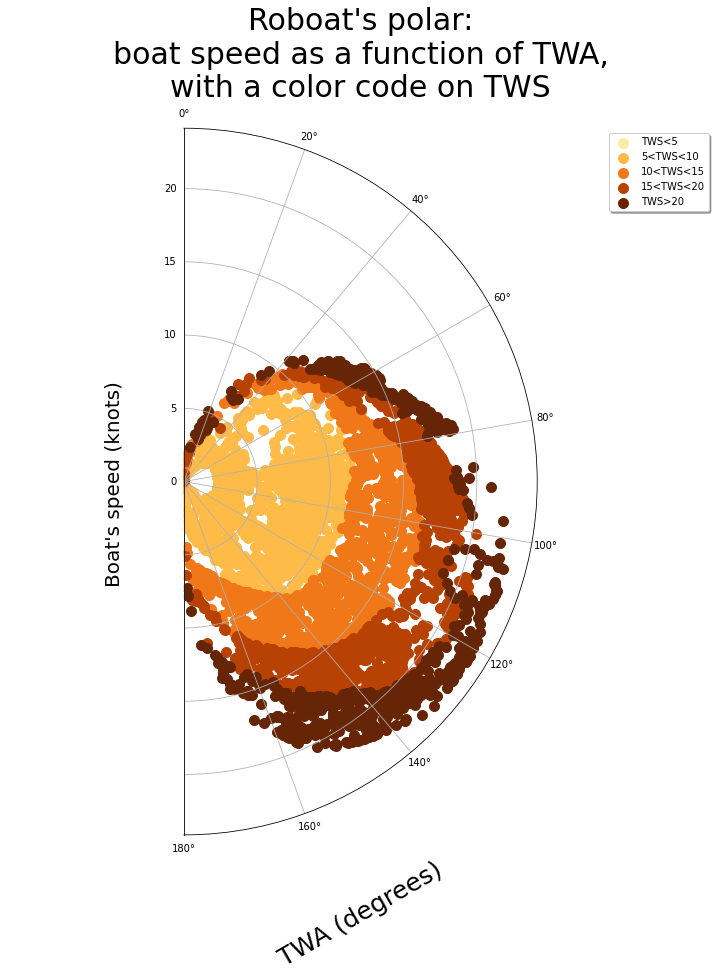

In [148]:
colors = df_mean["tws"]
area = df_mean["tws"] * 25
theta = radians(df_mean["twa_adjusted"])
surface=200


tws_speed_points = [5,10,15,20,20]
labels=["TWS<5", "5<TWS<10", "10<TWS<15", "15<TWS<20", "TWS>20"]
step=5
list_df_mean=separate_df(df_mean, "tws", labels, step, tws_speed_points)
list_df_filtered=separate_df(df_filtered, "tws", labels, step, tws_speed_points)

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
cmap = get_cmap(6)
for j, df_mean_tws in enumerate(list_df_mean):
    #ax.scatter(radians(df_mean_tws["twa_adjusted"]), df_mean_tws["speed"], label=labels[j], color=cmap(j+1), s=surface)
    ax.scatter(radians(list_df_filtered[j]["twa_adjusted"]), list_df_filtered[j]["speed"], label=labels[j], color=cmap(j+1), s=surface/2)

ax.set_title("Roboat's polar:\nboat speed as a function of TWA,\nwith a color code on TWS", va='bottom', size=30)
#ax.set_ylabel("Boat's speed (knots)", rotation=90, size=25, labelpad=1)
fig.text(0.25, 0.5, "Boat's speed (knots)", ha='center', va='center', rotation='vertical', size=20)
ax.set_xlabel("TWA (degrees)", rotation=30, size=25)
ax.legend(loc='best', fancybox=True, shadow=True, ncol=1)


plt.show()

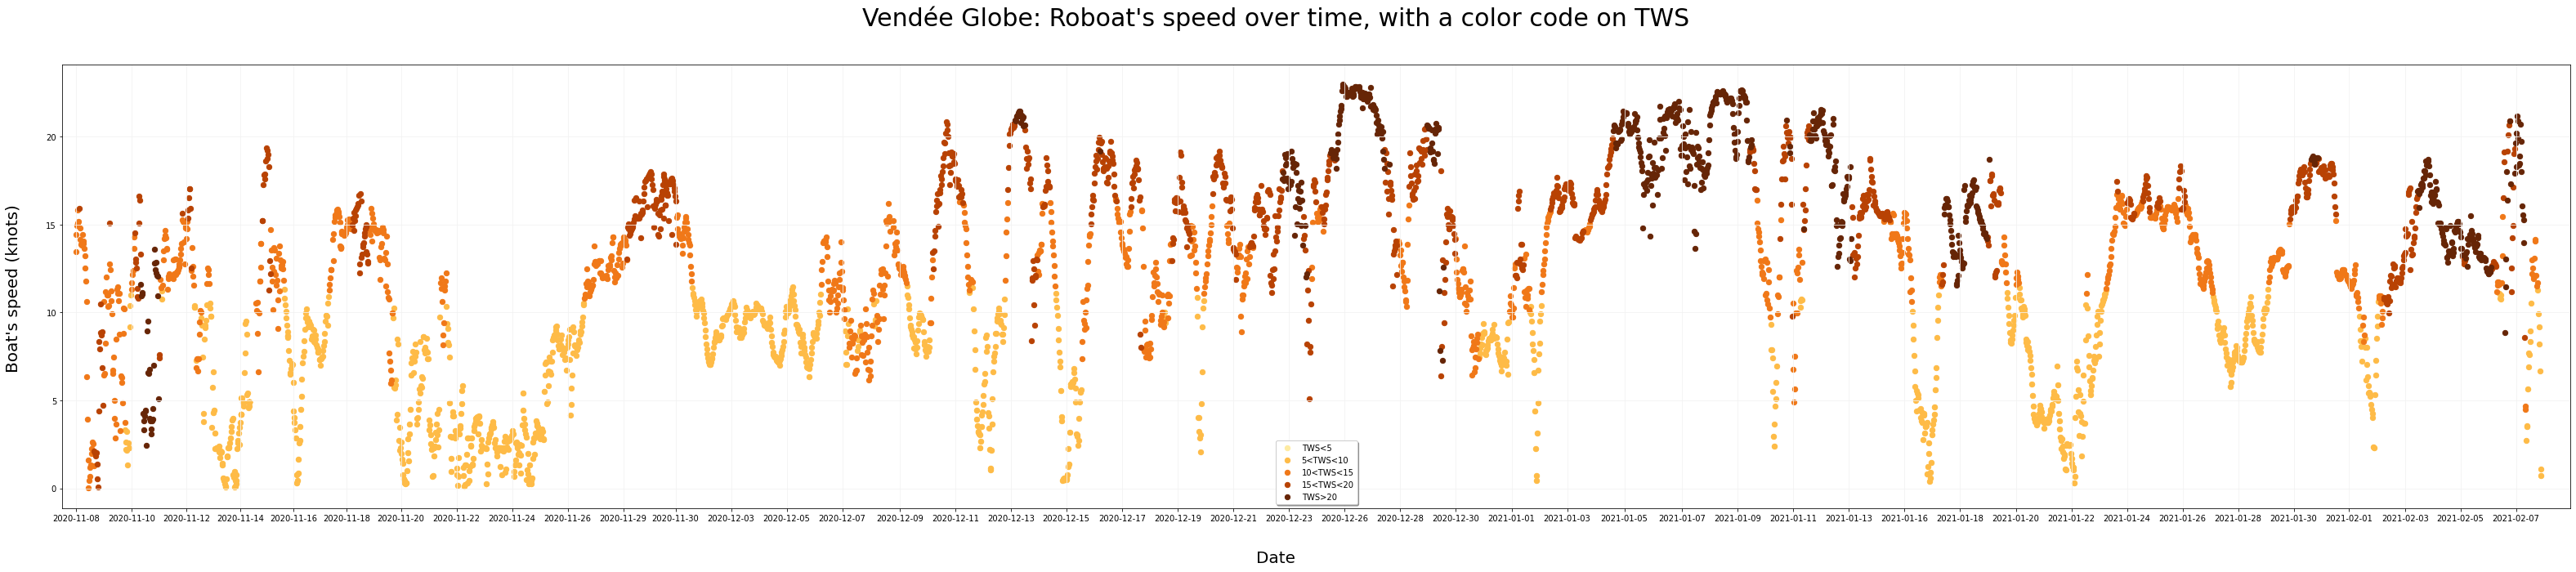

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(55, 10), sharey=True)

#axes.scatter(df_mean.index, df_mean["speed"], label=f'Speed (knots)')
#axes.scatter(df_filtered["lastCalcDate"], df_filtered["speed"], label=f'Speed (knots)')
for j, df_mean_tws in enumerate(list_df_mean):
    axes.scatter(list_df_filtered[j]["lastCalcDate"], list_df_filtered[j]["speed"], label=labels[j], color=cmap(j+1), s=surface/5)



fig.text(0.5, 0.04, 'Date', ha='center', va='center', size=20)
fig.text(0.11, 0.5, "Boat's speed (knots)", ha='center', va='center', rotation='vertical', size=20)
fig.suptitle("Vendée Globe: Roboat's speed over time, with a color code on TWS", fontsize=30)
axes.set_xbound("2020-11-08","2021-02-10")
axes.legend(loc='lower center',
                    ncol=1, fancybox=True, shadow=True)
xticks=[]
for i, date in enumerate(df_filtered["lastCalcDate"]):
    if i%100==0:
        xticks.append(date)
axes.set_xticks(xticks)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.show()

In [150]:
boat_speed_points = [5,10,15,20,20]
labels_boat_speed=["boat speed<5", "5<boat speed<10", "10<boat speed<15", "15<boat speed<20", "boat speed>20"]
step_boat_speed=5
list_df_boat_speed=separate_df(df_filtered, "speed", labels_boat_speed, step_boat_speed, boat_speed_points)

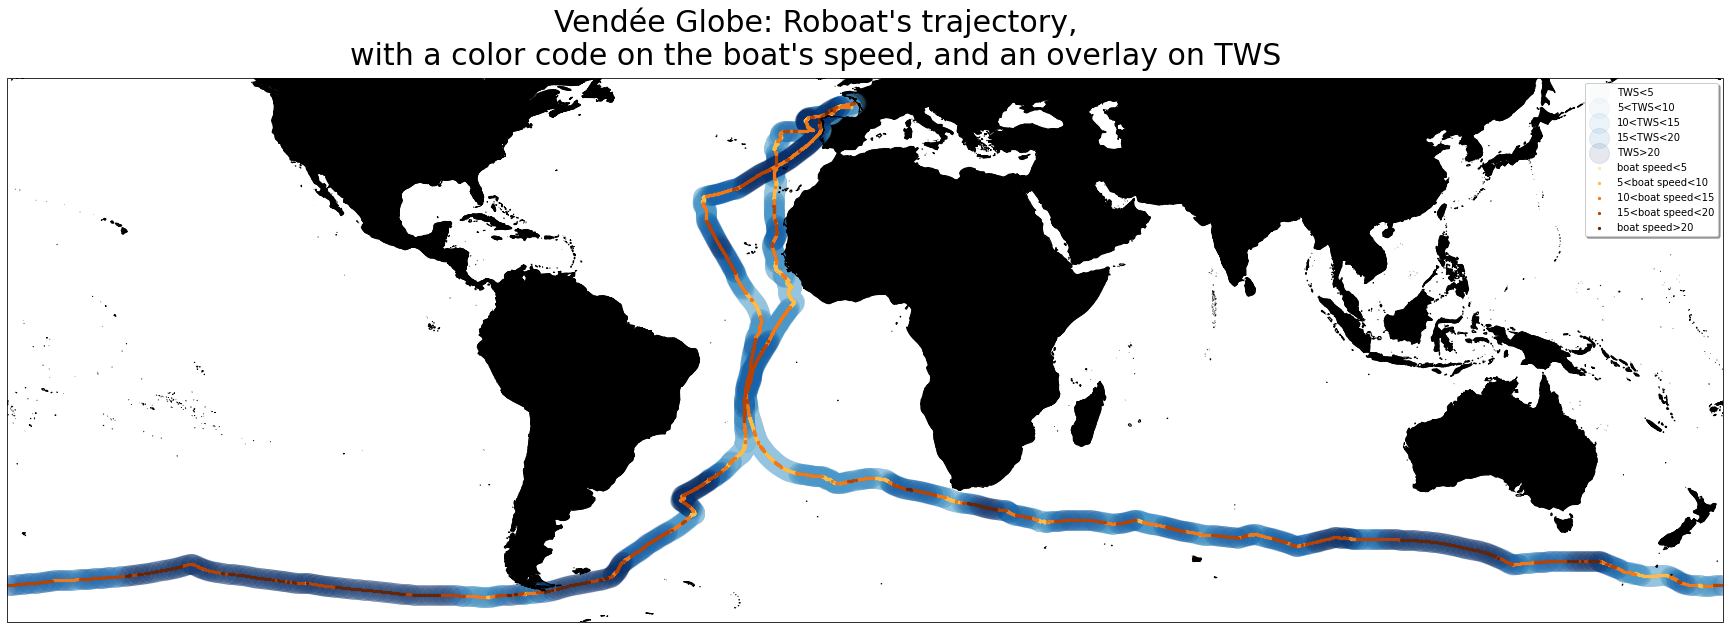

In [177]:
fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(55, 10), sharey=True)
#fig = plt.figure(figsize=(19.20,10.80), dpi=1000)
#fig.add_subplot(111)
#fig.tight_layout(pad=0)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cart.feature.LAND, facecolor='black')


cmap = get_cmap(6, 'Blues')
for j, df_boat_speed in enumerate(list_df_filtered):
    ax.scatter(df_boat_speed["lon"], df_boat_speed["lat"], label=labels[j], color=cmap(j+1), s=400, alpha=0.1)

cmap = get_cmap(6)
for j, df_boat_speed in enumerate(list_df_boat_speed):
    ax.scatter(df_boat_speed["lon"], df_boat_speed["lat"], label=labels_boat_speed[j], color=cmap(j+1), s=5)

plt.setp([ax.get_xticklines() + ax.get_yticklines() + ax.get_xgridlines() + ax.get_ygridlines()],antialiased=False)

fig.suptitle("Vendée Globe: Roboat's trajectory,\nwith a color code on the boat's speed, and an overlay on TWS", fontsize=30)
ax.legend(loc='best', ncol=1, fancybox=True, shadow=True)


plt.show()